# Multiple Linear Regression - log(saleprice)

### Prepare data for regression

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
new_test = pd.read_csv('./data/new_test.csv')
new_train = pd.read_csv('./data/new_train.csv')

In [3]:
new_train.drop(['Id'], axis = 1, inplace = True)
new_train = new_train.rename(columns={"Unnamed: 0": "Id"})
new_train = new_train.set_index('Id')

In [11]:
features = new_train.drop(['SalePrice'], axis = 1)
salePrice = new_train['SalePrice']
## get dummies
features = pd.get_dummies(features, drop_first = True)

### See distribution of sale price vs log(saleprice)

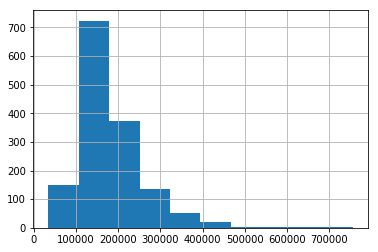

In [12]:
salePrice.hist()

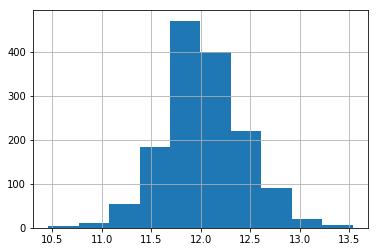

In [14]:
np.log(salePrice).hist()

### Mulitple Linear Regression

In [ ]:
from sklearn.cross_validation import train_test_split



(array([  1.,   2.,   3.,  35., 676., 707.,  24.,   6.,   5.,   1.]),
 array([-1.76937285e+05, -1.41549828e+05, -1.06162371e+05, -7.07749139e+04,
        -3.53874569e+04, -2.14204192e-08,  3.53874569e+04,  7.07749139e+04,
         1.06162371e+05,  1.41549828e+05,  1.76937285e+05]),
 <a list of 10 Patch objects>)

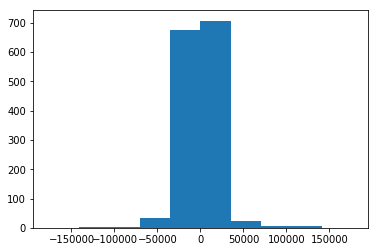

In [5]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(features, salePrice)
residuals = salePrice - lm.predict(features)
plt.hist(residuals)

In [6]:
print('R^2 is equal to %.3f' %(lm.score(features, salePrice)))
# print('RSS is equal to %.3f' %(np.sum((salePrice - lm.predict(features))**2)))
# print('The intercept is %.3f' %(lm.intercept_))
# print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.934


In [7]:
predicted = lm.predict(features)
predicted

array([209761.42416396, 205033.93036472, 205097.82741042, ...,
       275362.77960155, 142264.19406836, 150011.96085753])

### Multiple Linear Regression - log(saleprice)

(array([  4.,   2.,   9.,  64., 604., 706.,  67.,   2.,   1.,   1.]),
 array([-6.91829548e-01, -5.53463638e-01, -4.15097729e-01, -2.76731819e-01,
        -1.38365910e-01, -7.72715225e-14,  1.38365910e-01,  2.76731819e-01,
         4.15097729e-01,  5.53463638e-01,  6.91829548e-01]),
 <a list of 10 Patch objects>)

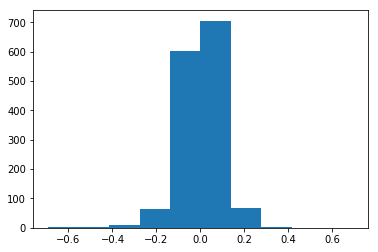

In [8]:
lm.fit(features, np.log(salePrice))
residuals = np.log(salePrice) - lm.predict(features)
plt.hist(residuals)

In [10]:
print('R^2 is equal to %.3f' %(lm.score(features, np.log(salePrice))))
# print('RSS is equal to %.3f' %(np.sum((np.log(salePrice) - lm.predict(features))**2)))
# print('The intercept is %.3f' %(lm.intercept_))
# print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.944


In [9]:
logpredicted = lm.predict(features)
np.exp(logpredicted)

array([206905.17838735, 200892.86952346, 213071.76155102, ...,
       277462.10178503, 143882.04152363, 146159.20079763])

### Feature Selection

### Significant Coefficients

In [15]:
import statsmodels.api as sm
x = sm.add_constant(features)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(np.log(salePrice), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     79.89
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:19:12   Log-Likelihood:                 1375.4
No. Observations:                1460   AIC:                            -2239.
Df Residuals:                    1204   BIC:                            -885.5
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -44.34

In [16]:
pValues = results.pvalues
sigCoef = pValues[pValues<0.05]